<a href="https://colab.research.google.com/github/howexg9/Statistics-for-Data-Science-Group4/blob/jvuhoang/notebook/Statistics-for-Data-Science-Group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics for Data Science
Summer 2025
Group 4

## Team members
- Jack (Xianguo) Hao
- Duc Vu Hoang
- Krishna Shah
- Joginder Singh

---

## **1. Hypothesis and Objectives of our Analysis**

**Objective:**  
The purpose of this project is to analyze how different living cost components vary across metro and non-metro areas in the U.S., and to build a predictive model estimating total living cost based on its components.

#### Part 1: Hypothesis and Statistical Inference

**Hypothesis Statement:**  
**H₀ (Null Hypothesis):** Cost of living in metro areas is not significantly greater than that in non-metro areas.

**H₁ (Alternative Hypothesis):** Cost of living in metro areas is significantly greater than that in non-metro areas.

**Method:**  
An independent sample t-test was used to determine if the total cost (‘total_cost’) is significantly greater than that in non-metro areas (‘isMetro’ = True vs. False). The dataset provides sufficient sample sizes for both groups (True: 11,700 records and False: 19,730 records). Assuming a 95% confidence level (alpha = 0.05, right-tailed test).



#### Part 2: Predictive Modeling

**Goal:**  
Build a model to predict `total_cost` of living using variables such as:

- `family_size`
- `isMetro`
- `state`
- `median_family_income`

**Proposed Method:**  
**Technique:** Ordinary Least Squares (OLS)/ Multiple Linear Regression  
**Target Variable:** `total_cost`  
**Independent Variables:** Multiple variables above

---

## **2. Data Preparation**

### **2.1 Importing Modules**

In [47]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np

# Importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
from pandas.plotting import scatter_matrix

# Importing libraries for statistical analysis
import statsmodels.api as sm
import matplotlib.ticker as ticker
import scipy
from scipy.stats import skew
from scipy.stats import ttest_ind
import scipy.stats as stats

# Importing libraries for machine learning
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### **2.2 Reading the data**

In [2]:
# Load the dataset
# The dataset contains the cost of living in various US cities
df = pd.read_csv('cost_of_living_us.csv', na_values = '\xa0')
df.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


### **2.3 Inspecting the Data**

Checking for missing values and Garbage values

In [3]:
# Using the info() method to get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [4]:
# Using the describe() method to get a summary of the DataFrame
# Note - Describe for int / float values
df.describe()

,case_id,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
count,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31420.000000
mean,1589.311804,11073.673539,8287.504557,13593.856381,13394.031748,7015.318377,9879.584233,7657.714782,70901.683601,68315.997017
std,917.218414,4165.606147,3271.140249,1640.456562,5204.545710,2397.415490,6778.223399,3339.795571,21846.545235,16886.970245
min,1.000000,4209.311280,2220.276840,2216.461440,3476.379960,2611.642080,0.000000,1027.800756,30087.662400,25529.976562
25%,792.000000,8580.000000,5801.424360,12535.159800,9667.440000,5286.354120,5341.621590,5597.970360,53776.019400,57223.988281
50%,1593.000000,10416.000000,8129.156280,13698.164400,13082.700000,6733.056120,10166.340120,6898.468860,70977.682800,65955.605469
75%,2386.000000,12444.000000,10703.624280,14765.758500,16657.816800,8413.090230,14276.377800,8790.207270,85371.341100,76136.070312
max,3171.000000,61735.587600,31178.619600,19816.482000,37252.274400,28829.443200,48831.085200,47753.390400,223717.548000,177662.468750


In [5]:
#Note - Data describe for Object values
df.describe(include=['O'])

,state,areaname,county,family_member_count
count,31430,31430,31430,31430
unique,51,2561,1877,10
top,TX,"Atlanta-Sandy Springs-Roswell, GA HUD Metro FM...",Washington County,1p0c
freq,2540,240,300,3143


In [6]:
# Duplicate Data
# Check for duplicate rows in the DataFrame
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.count()

,0
case_id,0
state,0
isMetro,0
areaname,0
county,0
family_member_count,0
housing_cost,0
food_cost,0
transportation_cost,0
healthcare_cost,0


In [7]:
# Null Data
# Checking for null values in the DataFrame
df.isnull().sum()

,0
case_id,0
state,0
isMetro,0
areaname,0
county,0
family_member_count,0
housing_cost,0
food_cost,0
transportation_cost,0
healthcare_cost,0


### **2.4 Initial Observations**

1. The data set contains 31430 rows and 15 columns
2. Max case_id value is 3171, however each row should have unique value and max value should be 31430 does this mean there are duplicate case_id values, and if yes what does that mean ? Additionally, as per duplicate check there are no duplicate rows. Further analysis is required and also if it would make sense to type cast this column to string / object.
3. Childcare_cost has $0 values - does that mean there is missing values?
4. There are 51 unique state values - further investigation showed states include Washington DC
5. Does values in 'areaname' columns are concatenated ? for instance 'Atlanta-Sandy.. ' and 'GA HUD Metro ..' is same area name or separate areanames
6. values in family_member_count also requires further investigation as it seems values in this field are coded. For instance does 1p0c means 1 person and no child ? if yes, this column is good candidate for Feature Engineer i.e. split parent and childrens information.
7. there are 10 ( 0.03% ) rows where median_family_income is Null. Potentially can drop these rows 10 rows without as the count is not significant (however will inspect for any pattern of Null rows i.e. all from same state/county etc.)
8. As per wikipedia, in US there are 3,244 counties, however the dataset used for analysis only has data for 1877 counties. This indicates the data set is subset of US counties and is not representing the full population ( Wiki Link https://en.wikipedia.org/wiki/List_of_United_States_counties_and_county_equivalents#:~:text=In%20total%2C%20the%2050%20states,United%20States%20as%20county%20equivalents.) Note: After further analysis, the data set has data for 3133 counties and for 89 counties data is not available. The unique county count fo 1877 is misleading since, same county name is reused in multiple states for example 'Washington Conunty' is common against 30 states. Additionally, Puerto Rico state has the majority of data missing (78 counties) followed by Connecticut and Alaska, for which we don't have county data for 9 and 2 counties respectively.

### **2.5 Data Transformation & Features engineering**

In [8]:
# Childcare cost is sometimes 0 - is this a problem? are there missing values?
# if there aren't any children in the household, then it would make sense that the childcare costs are also 0.
# if these are the only instances of 0 childcare costs, then there is no problem.

df[df['childcare_cost'] == 0]['family_member_count'].value_counts()

,count
family_member_count,
1p0c,3143
2p0c,3143


In [9]:
# That is exactly the case.
# Another question: are those numbers exactly 10% of our dataset?
df['family_member_count'].value_counts()

,count
family_member_count,
1p0c,3143
1p1c,3143
1p2c,3143
1p3c,3143
1p4c,3143
2p0c,3143
2p1c,3143
2p2c,3143
2p3c,3143


In [10]:
# There are exactly 10 rows per case_id and each family_member_count is represented exactly 1/10th of the time - is this related?
df.groupby(['family_member_count', 'case_id']).count().shape

(31430, 13)

The attribute 'childcare_cost' is sometimes 0, which is a red flag. However, it only occurs when the household happens to have no children, so it's entirely reasonable (also, it's always 0 when the household has no children).

Also, family_member_count has only 10 different possible values, each represented by a tenth of the total dataset. Furthermore, for each value of case_id, there are 10 rows - and each of these rows has one of the different values of 'family_member_count'.

In [11]:
# There are 51 states in our dataset, but aren't there only 50?

us_states = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}

df_states = set(df['state'].value_counts().keys().to_list())
# get the states in our dataset as a set
fifty_states = set(us_states.keys())
# get the actual 50 states as a set
df_states - fifty_states
# perform set subtraction to determine the extra state

# The extra state is DC - District of Columbia.
# This is a federal district, not a state, but it is included in the dataset as a state.
# This is a common practice in datasets that include US states, as DC is often treated as a state for statistical purposes.

# Updating the us_states dictionary to include DC
us_states["DC"] = "District of Columbia"

The 10 missing values for 'median_family_income' all come from the same case_id (all the rows for that case_id value have this data missing).
These 10 missing values are relative few in comparison to the entire database.
One reasonable way to fill in these 10 values is to use the average of the median family income based on the area, the state, and if it is metro or note

In [12]:
# The 10 rows with null values for median_family_income - each case_id value has 10 rows
df[df['median_family_income'].isnull()]

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
15110,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p0c,8052.0,3019.16160,11086.4934,6505.34988,4011.51852,0.00000,6075.80856,38750.3316,NaN
15111,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p1c,11256.0,4449.51084,11722.2708,9930.74856,5690.72604,7555.66332,7196.82420,57801.7440,NaN
15112,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p2c,11256.0,6519.27612,12405.8652,13356.14640,6440.68356,14323.03800,8732.72244,73033.7340,NaN
15113,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p3c,14688.0,8697.00216,12854.8620,16781.54400,8473.30884,16405.30800,11755.84356,89655.8676,NaN
15114,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p4c,14688.0,10645.71900,13619.9388,20206.94280,9179.40600,16405.30800,12372.99120,97118.3088,NaN
15115,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p0c,8772.0,5535.13032,12918.5988,13010.70000,5184.03768,0.00000,7023.17208,52443.6384,NaN
15116,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p1c,11256.0,6889.02612,13557.9828,16436.09760,6574.65816,7555.66332,8939.94504,71209.3716,NaN
15117,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p2c,11256.0,8724.80352,13977.7980,19861.49760,7239.83280,14323.03800,9841.96872,85224.9372,NaN
15118,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p3c,14688.0,10652.32248,14798.7552,23286.89520,9181.79808,16405.30800,11854.97676,100868.0508,NaN
15119,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p4c,14688.0,13035.88920,14802.7416,26712.29280,10045.45896,16405.30800,12050.91480,107740.6056,NaN


In [13]:
#Fill NaN values of median_family_income with the mean of median_family_income based on state, isMetro and area
df['median_family_income'] = df.groupby(['state','isMetro','areaname'])['median_family_income'].transform(lambda x: x.fillna(x.mean()))

In [14]:
# Checking again for null values in the DataFrame
df.isnull().sum()

,0
case_id,0
state,0
isMetro,0
areaname,0
county,0
family_member_count,0
housing_cost,0
food_cost,0
transportation_cost,0
healthcare_cost,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31430 non-null

In [16]:
# Extract the number of parents/children.
df['parent_count'] = df['family_member_count'].str[0].astype(int)
df['children_count'] = df['family_member_count'].str[2].astype(int)
df['family_size'] = df['parent_count'] + df['children_count']

df.head(3)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,parent_count,children_count,family_size
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,1
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,2
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,3


In [17]:
# visualize Total number of residents, number of children, number of parents, and number of households
df.groupby(['family_member_count']).agg(all_family_mem_count = ('family_size', 'sum'),
    count_children = ('children_count', 'sum'),
    count_parent = ('parent_count', 'sum'),
    count_family = ('family_member_count', 'count')
)

,all_family_mem_count,count_children,count_parent,count_family
family_member_count,,,,
1p0c,3143,0,3143,3143
1p1c,6286,3143,3143,3143
1p2c,9429,6286,3143,3143
1p3c,12572,9429,3143,3143
1p4c,15715,12572,3143,3143
2p0c,6286,0,6286,3143
2p1c,9429,3143,6286,3143
2p2c,12572,6286,6286,3143
2p3c,15715,9429,6286,3143


In [18]:
# Showing the updated DataFrame
df.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,parent_count,children_count,family_size
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,1
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,2
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,3
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,4
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31430 non-null

## 3.Hypothesis testing

Hypothesis Statement:
*   H₀ (Null Hypothesis): The cost of living in metro areas is not significantly greater than that in non-metro areas.
*   H₁ (Alternative Hypothesis): The cost of living in metro areas is significantly greater than that in non-metro areas.


Method:
We will use an independent samples t-test to determine if the total cost is significantly greater in Metro areas compared to non-Metro areas (isMetro = True vs. False). The dataset provides sufficient sample sizes for both groups.

In [20]:
df['isMetro'].value_counts()

,count
isMetro,
False,19730
True,11700


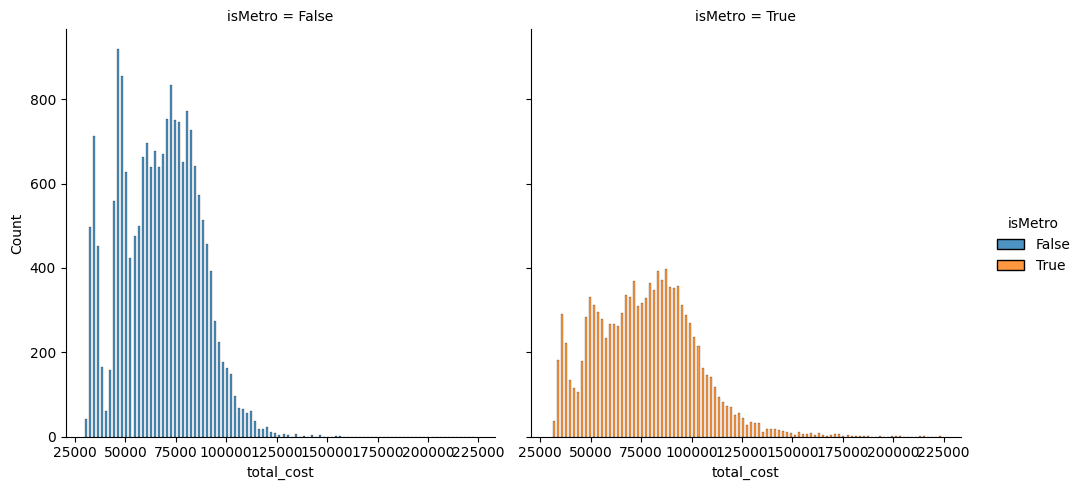

In [21]:
sns.displot(data=df, x='total_cost', hue="isMetro", col="isMetro", alpha=.8, multiple = 'dodge')

In [22]:
#evaluate skewness for total_cost for each group isMetro = True and False
df_metro = df[df['isMetro'] == True]
df_non_metro = df[df['isMetro'] == False]
skew_val_metro = skew(df_metro['total_cost'], axis=0, bias=True)
skew_val_non_metro = skew(df_non_metro['total_cost'], axis=0, bias=True)
print(f"Skewness for cost of living data for residents in Metro areas is: {skew_val_metro}")
print(f"Skewness for cost of living data for residents in non-Metro areas is: {skew_val_non_metro}")

Skewness for cost of living data for residents in Metro areas is: 0.5003932588354552
Skewness for cost of living data for residents in non-Metro areas is: 0.13373646799179525


In [45]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Check outliers for each group
metro_outliers = detect_outliers(df[df['isMetro'] == True]['total_cost'])
non_metro_outliers = detect_outliers(df[df['isMetro'] == False]['total_cost'])

print(f"Metro outliers: {len(metro_outliers)}")
print(f"Non-Metro outliers: {len(non_metro_outliers)}")

Metro outliers: 110
Non-Metro outliers: 31


Our data is slightly Right or Positively Skewed as the skewness is 0.13 and 0.5, which suggests some counties may have very high cost values. Outliers analysis shows Outliers account for less than 1% of data in both groups and do not materially impact the test result.

Therefore, we can accept the hypothesis testing result without normalizing data, as it does not violate the normality assumption too severely and the sample size is large enough to ensure the test is robust.

In [23]:
# Statistical Inference testing with Welch's T-test

metro_costs = df[df['isMetro'] == True]['total_cost']
non_metro_costs = df[df['isMetro'] == False]['total_cost']

ttest_result = ttest_ind(metro_costs, non_metro_costs, equal_var=False,alternative= 'greater') #equal_var = False to perform Welsh t-test (not assuming equal population variance)

print(f"T-statistic: {ttest_result.statistic}")
print(f"P-value: {ttest_result.pvalue}")

if ttest_result.pvalue < 0.05:
    print("Cost of living in metro areas is greater than that in non-metro areas with statistical significance.")
else:
    print("Cost of living in metro areas is NOT greater than that in non-metro areas with statistical significance.")

T-statistic: 33.366446428578925
P-value: 7.06028909263763e-238
Cost of living in metro areas is greater than that in non-metro areas with statistical significance.


###**T-Test Results**
The independent samples t-test was conducted to compare the total cost of living in metro and non-metro areas. The results of the test are as follows:

*   T-statistic: 33.366446428578925
*   P-value: 7.06028909263763e-238

Since the p-value is significantly less than our alpha level of 0.05, we reject the null hypothesis. This result provides a very strong statistical evidence that the cost of living is higher in metro areas than in non-metro areas.

## **4. Predictive Model**

### 4.1 Exploratory Analysis

In [24]:
#Find avg total cost by State & Metro area

df.groupby(["state","isMetro"])["total_cost"].mean().unstack().sort_values(by = True, ascending = False).head(15)

isMetro,False,True
state,,
DC,NaN,120289.636920
HI,103949.690160,105528.977000
MA,102463.220800,101735.672804
CA,81605.160183,99748.191720
VT,79096.253051,97959.253080
NY,73236.936600,95307.497144
NJ,NaN,92575.263891
CT,85104.819240,90714.745389
CO,72887.801543,90611.966894


<Axes: xlabel='state'>

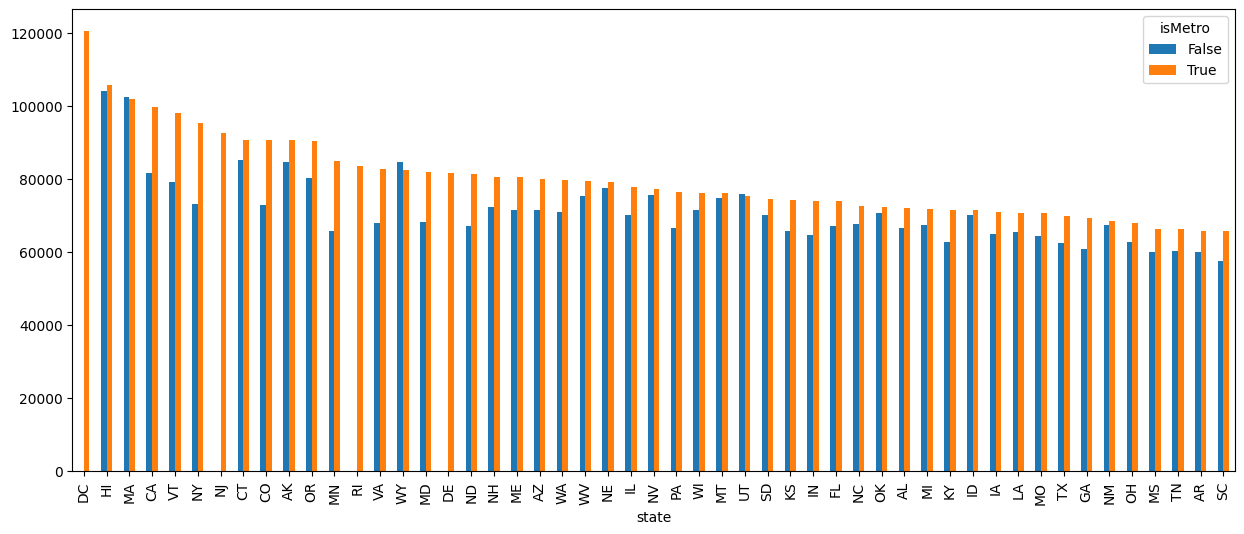

In [25]:
#Graph average total cost by State and metro area

df.groupby(["state","isMetro"])["total_cost"].mean().unstack().sort_values(by = True, ascending = False).plot(kind='bar', stacked=False, figsize=(15, 6))

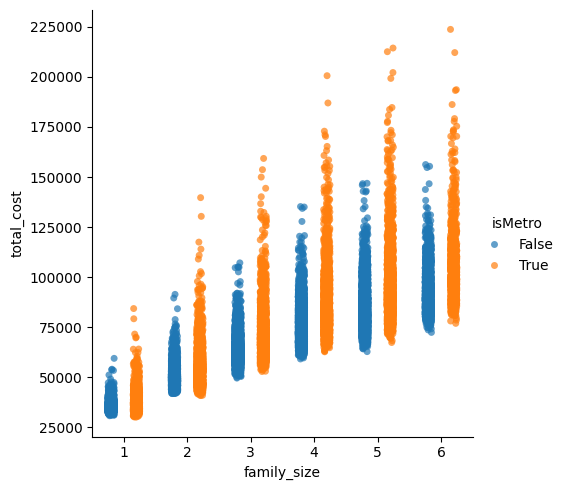

In [26]:
#Plot total cost by family size and metro area

sns.catplot(df, x = 'family_size', y = 'total_cost',hue = 'isMetro', alpha = 0.7, dodge=True)

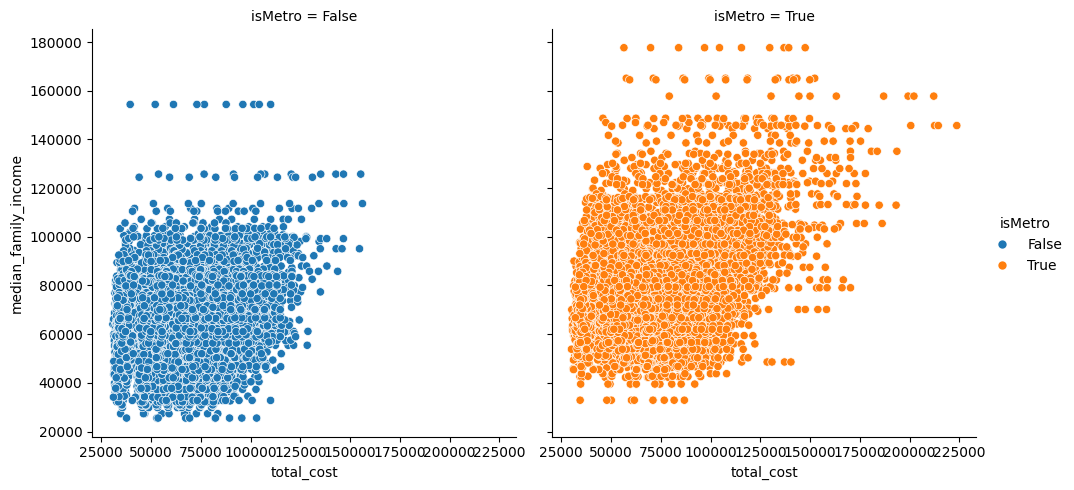

In [27]:
#relation between total_cost and income

sns.relplot(data = df, x = 'total_cost', y = 'median_family_income', hue = 'isMetro', col =  'isMetro')

### 4.2 OLS/ Multiple Linear Regression


In [28]:
df3 = df[['total_cost','state', 'isMetro', 'median_family_income', 'family_size']]

df3

,total_cost,state,isMetro,median_family_income,family_size
0,39254.0532,AL,True,73010.414062,1
1,57194.3256,AL,True,73010.414062,2
2,76141.0308,AL,True,73010.414062,3
3,94203.5328,AL,True,73010.414062,4
4,100823.5200,AL,True,73010.414062,5
...,...,...,...,...,...
31425,55415.4672,WY,False,80177.656250,2
31426,75424.1832,WY,False,80177.656250,3
31427,96413.1684,WY,False,80177.656250,4
31428,113294.2260,WY,False,80177.656250,5


In [29]:
# Define the dictionary to map states to regions
state_to_region_dict = {
    'WA': 'West', 'OR': 'West', 'CA': 'West', 'NV': 'West', 'ID': 'West', 'MT': 'West', 'WY': 'West', 'CO': 'West', 'UT': 'West', 'AZ': 'West', 'NM': 'West', 'AK': 'West', 'HI': 'West',
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'WI': 'Midwest', 'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest',
    'TX': 'South', 'OK': 'South', 'AR': 'South', 'LA': 'South', 'MS': 'South', 'AL': 'South', 'TN': 'South', 'KY': 'South', 'GA': 'South', 'FL': 'South', 'SC': 'South', 'NC': 'South', 'VA': 'South', 'WV': 'South', 'DE': 'South', 'MD': 'South', 'DC': 'South',
    'PA': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast', 'CT': 'Northeast', 'RI': 'Northeast', 'MA': 'Northeast', 'VT': 'Northeast', 'NH': 'Northeast', 'ME': 'Northeast'
}

df3['region'] = df3['state'].map(state_to_region_dict)
df3.head()

/tmp/ipython-input-29-616778173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['region'] = df3['state'].map(state_to_region_dict)


,total_cost,state,isMetro,median_family_income,family_size,region
0,39254.0532,AL,True,73010.414062,1,South
1,57194.3256,AL,True,73010.414062,2,South
2,76141.0308,AL,True,73010.414062,3,South
3,94203.5328,AL,True,73010.414062,4,South
4,100823.5200,AL,True,73010.414062,5,South


<Axes: xlabel='region'>

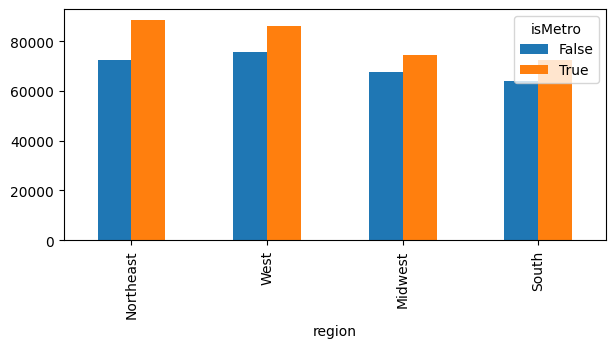

In [30]:
#Graph average total cost by region and metro area

df3.groupby(["region","isMetro"])["total_cost"].mean().unstack().sort_values(by = True, ascending = False).plot(kind='bar', stacked=False, figsize=(7, 3))

In [31]:
# Create a new feature matrix with 'region' instead of 'state'
X_region = pd.concat([df3[['median_family_income', 'family_size']], pd.get_dummies(df3['isMetro'], drop_first=True, dtype=int), pd.get_dummies(df3['region'], drop_first=True, dtype=int)], axis=1)
X_region = sm.add_constant(X_region)

# Dependent variable remains the same
y_region = df3['total_cost']

# Fit the new OLS model
model_region = sm.OLS(y_region, X_region).fit()

# Print the model summary
print(model_region.summary())

                            OLS Regression Results                            
Dep. Variable:             total_cost   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 3.384e+04
Date:                Wed, 30 Jul 2025   Prob (F-statistic):               0.00
Time:                        02:01:40   Log-Likelihood:            -3.2706e+05
No. Observations:               31430   AIC:                         6.541e+05
Df Residuals:                   31423   BIC:                         6.542e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -63.4546 

Note:



*   US States were grouped into Northeast, South, West, and Midwest. The coefficients above are compared to Midwest (which is the benchmark)
*   Variable 'isMetro' include values 'True' and 'False'. Coefficient above for 'True' (meaning for Metro area residents) is in comparison to 'False' (which stands for non Metro residents and is benchmark).
*   Issue of multicollinearity was noted:

Skewness/Kurtosis: High → residuals are not normally distributed; consider log or Box-Cox transformation.

Durbin-Watson = 0.725: Suggests positive autocorrelation in residuals — not ideal for time-series but tolerable in cross-sectional data.

Condition Number = 4.1e+05: Possible multicollinearity (likely between income and region); should check Variance Inflation Factor (VIF).







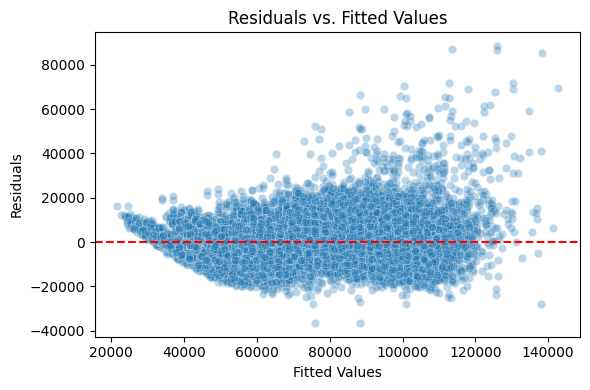

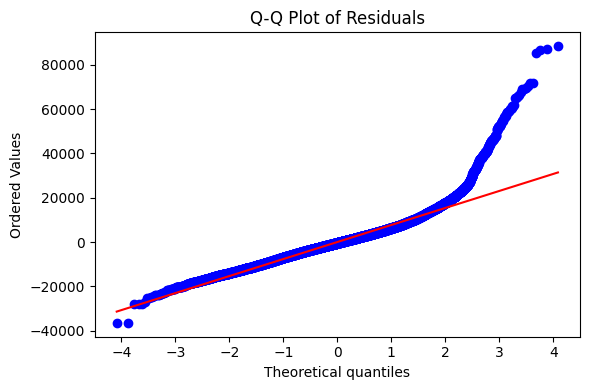

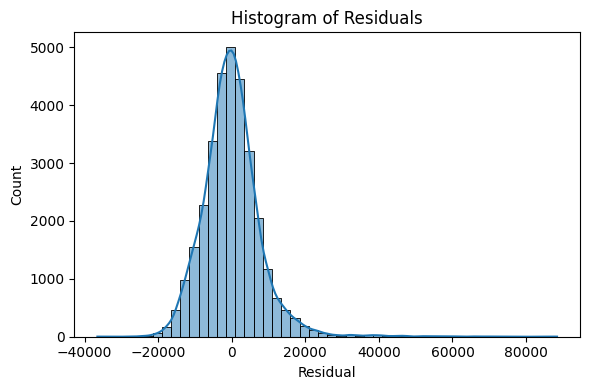

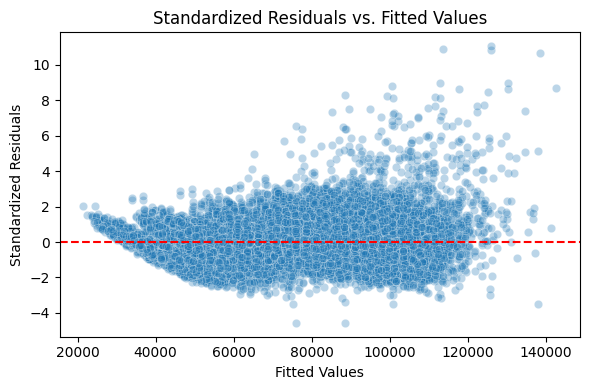

In [48]:
# Predicted values and residuals from OLS model
fitted_vals = model_region .fittedvalues
residuals = model_region .resid
standardized_residuals = (residuals - residuals.mean()) / residuals.std()

# Plot 1: Residuals vs Fitted Values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted_vals, y=residuals, alpha=0.3)
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# Plot 2: Q-Q Plot for Normality
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

# Plot 3: Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=50)
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()

# Plot 4: Standardized Residuals vs Fitted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted_vals, y=standardized_residuals, alpha=0.3)
plt.axhline(0, linestyle='--', color='red')
plt.title("Standardized Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.tight_layout()
plt.show()

1. Residuals vs. Fitted Plot: Whether residuals are randomly scattered.
What we see: Some curvature and variance increase at higher fitted values.
Conclusion: This suggests non-linearity or heteroscedasticity (non-constant variance), which violates OLS assumptions.

2. Q-Q Plot (Quantile-Quantile): If residuals are normally distributed.
What we see: Deviations from the line, especially at the tails.
Conclusion: Residuals are not perfectly normal — consistent with the high skew/kurtosis we saw earlier.

3. Histogram of Residuals: Distribution of residuals.
What we see: Right-skewed distribution — long tail on the right.
Conclusion: Confirms that residuals are not perfectly normal.

4. Standardized Residuals vs. Fitted Values: Standardized error pattern across fitted values.
What we see: Similar pattern to the raw residuals — increasing spread at higher predictions.
Conclusion: Evidence of heteroscedasticity.

In [52]:
#Apply a log transformation to the target and re-run the model


# Create a new feature matrix with 'region' instead of 'state'
X_region = pd.concat([
    df3[['median_family_income', 'family_size']],
    pd.get_dummies(df3['isMetro'], drop_first=True, dtype=int),
    pd.get_dummies(df3['region'], drop_first=True, dtype=int)
], axis=1)
X_region = sm.add_constant(X_region)

# Apply log transformation to the dependent variable
df3['log_total_cost'] = np.log(df3['total_cost'])
y_region = df3['log_total_cost']

# Fit the new OLS model with log-transformed target
log_model_region = sm.OLS(y_region, X_region).fit()

# Print the model summary
print(log_model_region.summary())

                            OLS Regression Results                            
Dep. Variable:         log_total_cost   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                 3.780e+04
Date:                Wed, 30 Jul 2025   Prob (F-statistic):               0.00
Time:                        02:21:25   Log-Likelihood:                 24157.
No. Observations:               31430   AIC:                        -4.830e+04
Df Residuals:                   31423   BIC:                        -4.824e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.1218 

/tmp/ipython-input-52-2865378016.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['log_total_cost'] = np.log(df3['total_cost'])


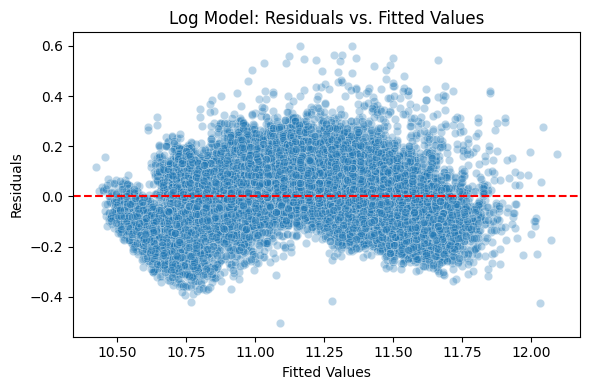

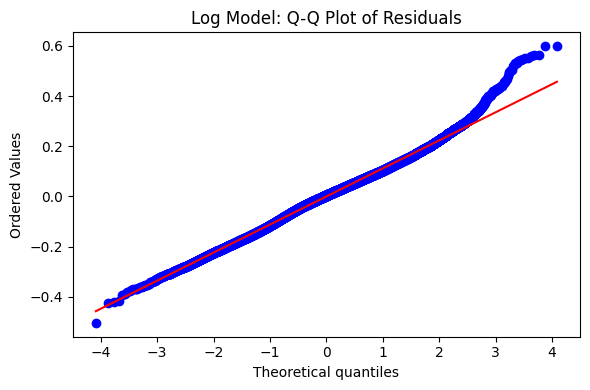

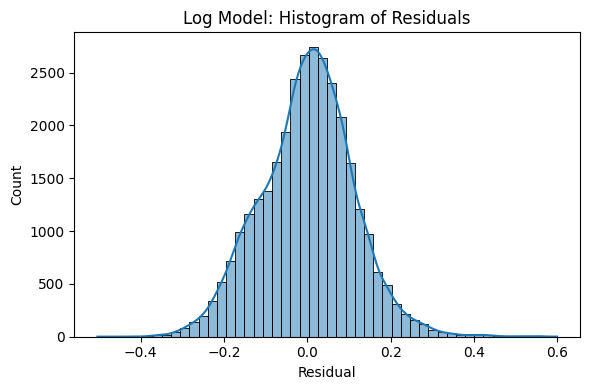

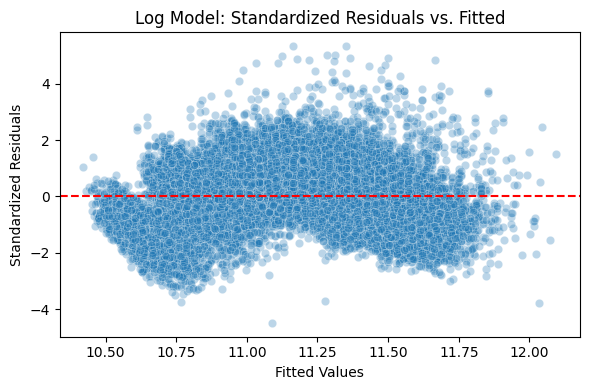

In [53]:


# Step 1: Get fitted values and residuals from your model
fitted_vals_log = log_model_region.fittedvalues
residuals_log = log_model_region.resid
standardized_residuals_log = (residuals_log - residuals_log.mean()) / residuals_log.std()

# =======================
# Plot 1: Residuals vs Fitted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted_vals_log, y=residuals_log, alpha=0.3)
plt.axhline(0, linestyle='--', color='red')
plt.title("Log Model: Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# =======================
# Plot 2: Q-Q Plot for Normality
plt.figure(figsize=(6, 4))
stats.probplot(residuals_log, dist="norm", plot=plt)
plt.title("Log Model: Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

# =======================
# Plot 3: Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals_log, kde=True, bins=50)
plt.title("Log Model: Histogram of Residuals")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()

# =======================
# Plot 4: Standardized Residuals vs Fitted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted_vals_log, y=standardized_residuals_log, alpha=0.3)
plt.axhline(0, linestyle='--', color='red')
plt.title("Log Model: Standardized Residuals vs. Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.tight_layout()
plt.show()

1. Residuals vs. Fitted Values Observation: The residuals appear more evenly spread around zero, with less visible heteroscedasticity compared to the original model.
Improvement: The log transformation has helped stabilize variance, improving homoscedasticity.

2. Q-Q Plot Observation: Residuals align much more closely to the diagonal, especially in the middle.
Improvement: Residuals are now much closer to normal, which strengthens the model’s validity.

3. Histogram of Residuals Observation: The residuals are more symmetric and approximately bell-shaped.
Indicates improved normality of errors.

4. Standardized Residuals vs. Fitted Observation: Residual spread is more consistent across predicted values.
Shows reduced influence from outliers or non-constant variance.

In [54]:
#Calculate VIF for multicollinearity

# Drop the constant before computing VIF
X_log_no_const = X_region.drop(columns='const')

# Create a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data['Feature'] = X_log_no_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_log_no_const.values, i)
                   for i in range(X_log_no_const.shape[1])]

# Sort VIF values in descending order
vif_data = vif_data.sort_values('VIF', ascending=False).reset_index(drop=True)

# Display the VIF DataFrame
print(vif_data)

                Feature       VIF
0  median_family_income  7.002970
1           family_size  5.319188
2                 South  2.050130
3                  True  1.901744
4                  West  1.392214
5             Northeast  1.250344


VIF > 10: Serious multicollinearity

VIF between 5–10: Moderate, monitor

VIF < 5: Low, acceptable

The top two predictors (median_family_income and family_size) have moderate VIF, possibly due to correlation with each other or with region.

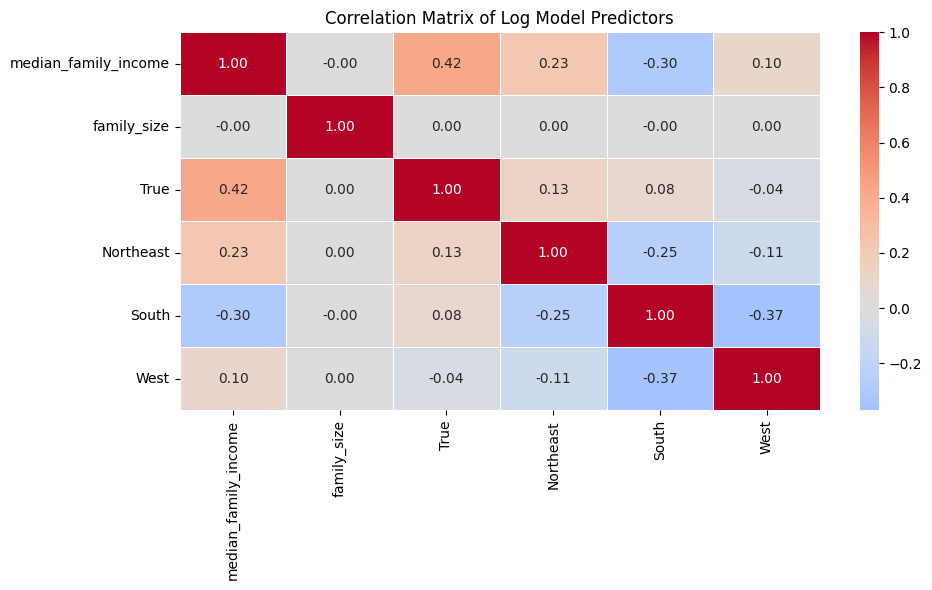

In [55]:
# Visualize the correlation matrix

# Compute the correlation matrix (exclude intercept)
corr_matrix = X_region.drop(columns='const').corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix of Log Model Predictors")
plt.tight_layout()
plt.show()

The predictors (e.g., median_family_income, family_size, isMetro, and region dummies) are not strongly linearly correlated with each other.

This supports the low to moderate VIFs you saw earlier.

So do not need to drop or combine variables due to multicollinearity at this stage.

Therefore, next step, we would apply Ridge Regression and Standardization to our data to address these issues.

### 4.3 Ridge Regression & Standardization

In [32]:
# Independent Variables
X_region = pd.concat([
    df3[['median_family_income', 'family_size']],
    pd.get_dummies(df3['isMetro'], drop_first=True, dtype=int),
    pd.get_dummies(df3['region'], drop_first=True, dtype=int)
], axis=1)

# Convert all column names to strings
X_region.columns = X_region.columns.astype(str)

# Dependent Variable
y_region = df3['total_cost']

# Standardization to address different scales
# Ridge regression to shrinks coefficients and address multicollinearity
ridge_model = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0)
)

# Fit Ridge Regression model
ridge_model.fit(X_region, y_region)

# Evaluate the model
r_squared = ridge_model.score(X_region, y_region)
print(f"Ridge Regression R²: {r_squared:.4f}")

Ridge Regression R²: 0.8660


In [33]:
# Find the best alpha value
alphas = np.logspace(-3, 3, 100)

ridge_cv_model = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=alphas, store_cv_values=True)
)

ridge_cv_model.fit(X_region, y_region)

best_alpha = ridge_cv_model.named_steps['ridgecv'].alpha_
r_squared = ridge_cv_model.score(X_region, y_region)

print(f"Best alpha: {best_alpha}")
print(f"Ridge Regression R² with best alpha: {r_squared:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Best alpha: 0.7054802310718645
Ridge Regression R² with best alpha: 0.8660


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:110: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


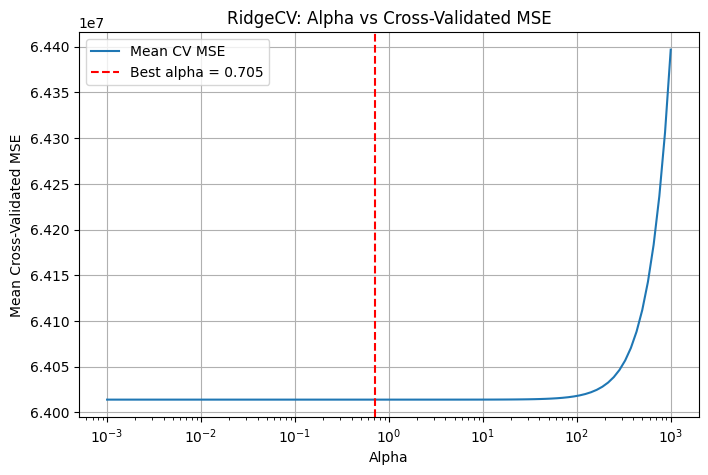

In [34]:
#Plot the Alpha vs Cross-Validated MSE

cv_values = ridge_cv_model.named_steps['ridgecv'].cv_values_.mean(axis=0)

plt.figure(figsize=(8, 5))
plt.semilogx(alphas, cv_values, label='Mean CV MSE')
plt.axvline(best_alpha, color='red', linestyle='--', label=f'Best alpha = {best_alpha:.3f}')
plt.xlabel('Alpha')
plt.ylabel('Mean Cross-Validated MSE')
plt.title('RidgeCV: Alpha vs Cross-Validated MSE')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
#Run Ridge model again with the optimal alpha of 0.7
X_region = pd.concat([
    df3[['median_family_income', 'family_size']],
    pd.get_dummies(df3['isMetro'], drop_first=True, dtype=int),
    pd.get_dummies(df3['region'], drop_first=True, dtype=int)
], axis=1)

X_region.columns = X_region.columns.astype(str)

y_region = df3['total_cost']

ridge_model = make_pipeline(
    StandardScaler(),
    Ridge(alpha=0.7)
)

ridge_model.fit(X_region, y_region)

r_squared = ridge_model.score(X_region, y_region)
print(f"Ridge Regression R²: {r_squared:.4f}")

Ridge Regression R²: 0.8660


In [36]:
# Find Ridge coefficients for each independent variable
ridge_model_fitted = ridge_cv_model.named_steps['ridgecv']

feature_names = X_region.columns

coefficients = ridge_model_fitted.coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Ridge Coefficient': coefficients
}).sort_values(by='Ridge Coefficient', key=abs, ascending=False)

print(coef_df)

                Feature  Ridge Coefficient
1           family_size       18617.950750
0  median_family_income        6002.864677
5                  West        3089.832493
3             Northeast        1857.796999
2                  True        1643.820136
4                 South         216.837802


In [37]:
#  Inverse Transform Ridge Coefficients to interpret results
scaler = ridge_cv_model.named_steps['standardscaler']
ridge = ridge_cv_model.named_steps['ridgecv']

# Variables and coefficients
feature_names = X_region.columns
coef_std = ridge.coef_
intercept_std = ridge.intercept_

# Identify which columns were scaled (only numeric features)
num_cols = ['median_family_income', 'family_size']
cat_cols = [col for col in X_region.columns if col not in num_cols and col != 'const']

# Extract means and scales used in standardization
means = scaler.mean_
scales = scaler.scale_

# Prepare mapping of coefficients to original scale
coef_unscaled = []
intercept_unscaled = intercept_std

# Index to track feature order
for i, name in enumerate(feature_names):
    if name in num_cols:
        idx = num_cols.index(name)
        # Reverse scaling: original_coef = standardized_coef / scale
        coef_orig = coef_std[i] / scales[idx]
        coef_unscaled.append(coef_orig)
        # Adjust intercept: intercept -= coef * mean/scale
        intercept_unscaled -= coef_std[i] * means[idx] / scales[idx]
    else:
        # Dummy variables (categorical): not scaled
        coef_unscaled.append(coef_std[i])

# Add intercept
coef_unscaled = pd.DataFrame({
    'Feature': feature_names,
    'Unstandardized Coef': coef_unscaled
})

# Add intercept as separate row
coef_unscaled = pd.concat([
    pd.DataFrame({'Feature': ['Intercept'], 'Unstandardized Coef': [intercept_unscaled]}),
    coef_unscaled
], ignore_index=True)

# Sort and display
coef_unscaled_sorted = coef_unscaled.sort_values(by='Unstandardized Coef', key=abs, ascending=False)
print(coef_unscaled_sorted)

                Feature  Unstandardized Coef
2           family_size         12411.967167
0             Intercept          3171.308818
6                  West          3089.832493
4             Northeast          1857.796999
3                  True          1643.820136
5                 South           216.837802
1  median_family_income             0.355515


### 4.4 Compare OLS & Ridge coefficients

In [38]:
# Compare Coefficients for Ridge and OLS

model_region = sm.OLS(y_region, X_region).fit()

In [39]:
ols_coefs = model_region.params.reset_index()
ols_coefs.columns = ['Feature', 'OLS Coef']

In [40]:
# Remove 'const' from OLS and rename it to 'Intercept'
ols_coefs['Feature'] = ols_coefs['Feature'].replace({'const': 'Intercept'})

# Merge Ridge and OLS on 'Feature'
comparison_df = pd.merge(
    coef_unscaled_sorted,  # Ridge Coefs (unstandardized)
    ols_coefs,
    on='Feature',
    how='outer'
)

# Compute difference (Ridge - OLS)
comparison_df['Difference'] = comparison_df['Unstandardized Coef'] - comparison_df['OLS Coef']

# Sort by absolute difference
comparison_df = comparison_df.sort_values(by='Difference', key=abs, ascending=False)

# Display
print(comparison_df)

                Feature  Unstandardized Coef      OLS Coef   Difference
4                  West          3089.832493   8832.933230 -5743.100737
1             Northeast          1857.796999   7327.311417 -5469.514418
3                  True          1643.820136   3408.222076 -1764.401940
2                 South           216.837802    423.029883  -206.192081
5           family_size         12411.967167  12410.320690     1.646477
6  median_family_income             0.355515      0.354842     0.000673
0             Intercept          3171.308818           NaN          NaN


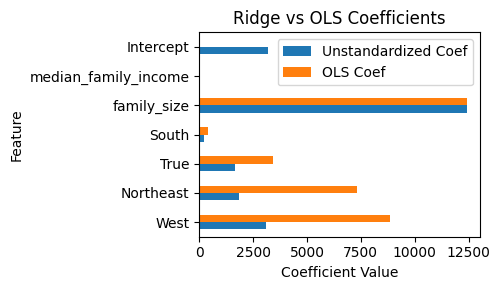

In [41]:
#Plot for visualization the differences
comparison_df.set_index('Feature')[['Unstandardized Coef', 'OLS Coef']].plot(
    kind='barh', figsize=(5, 3), title='Ridge vs OLS Coefficients'
)
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

### 4.5 Train & Test Ridge Regression model

In [42]:
#Split dataset and test Ridge Regresssion above:

X_train, X_test, y_train, y_test = train_test_split(X_region, y_region, test_size=0.2, random_state=42)


In [43]:
ridge = Ridge(alpha=0.7)
ridge.fit(X_train, y_train)

Ridge(alpha=0.7)

In [44]:
y_pred = ridge.predict(X_test)


# Calculate MSE, RMSE, MAE, and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 65007863.97460893
RMSE: 8062.745436550067
MAE: 5754.5306839497935
R-squared: 0.8636599525813848


This result indicates that the Ridge model retains most of the predictive power of the OLS regression (R-squared = 86%) with more stable coefficients and less sensitivity to multicollinearity. RMSE (Root Mean Squared Error) represents the typical prediction error of 8,062 USD  (sensitive to outliers) and MAE (Mean Absolute Error) represents the average prediction error of 5,755 USD (less sensitive to outliers). This range of error is acceptable considering the typical cost of living ranging from 27,000 to more than $200,000 USD.
Overall, this is a strong and reliable predictive model. It explains the majority of variation in total cost, has relatively low average error and rarely makes very large mistakes.


## 5.Suggestions to improve model

1. Examine geographic components down to county level (i.e. total cost of living varies between counties in the same state)

2. Include other independent variables (housing price, age bracket, private vs public schools for children, etc.)

3.